# retenmod

[Andy Wheeler, PhD](mailto:apwheele@gmail.com)

Example analysis to illustrate the functions in the retenmod python package. For background, this is a port of the R library [foretell](https://cran.r-project.org/web/packages/foretell/foretell.pdf), and for notes on the original models, see [*“How to Project Customer Retention” Revisited: The Role of Duration Dependence* (Fader et al., 2018)](https://www.sciencedirect.com/science/article/pii/S1094996818300057).

For this example, I will use data from [*Hiring and Retention Issues in Police Agencies: Readings on the Determinants of Police
Strength, Hiring and Retention of Officers, and the Federal COPS Program*](https://www.ojp.gov/sites/g/files/xyckuh241/files/media/document/193428.pdf) by Koper, Maguire, and Moore (2002). Specifically pg 60, the probability that staff increases via COPs grants will be maintained.

In [1]:
import retenmod
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

# Data on retention for small and large agencies
small = [100,63,50,44,40,37]
large = [100,66,56,52,49,47]

# For the follow up 10 & 15 years
small_fu = [30,28]
large_fu = [44,42]

# Checking out the fit for the small agencies
sml_bg = retenmod.bg(small,10)
sml_bg #projected 28,24 -- so not as good a fit

churnmod(proj=array([100.        ,  62.76829767,  50.7977593 ,  44.28626722,
        40.01108913,  36.91344314,  34.52797439,  32.61315509,
        31.02919696,  29.68868882,  28.53371259,  27.52412366,
        26.63107437,  25.83321289,  25.11434065,  24.4619088 ]), negLL=140.44829882757764, params=array([0.39097901, 0.65914491]))

In [2]:
# Lets try the BdW model

sml_bdw = retenmod.bdw(small,10)
sml_bdw #projected 29,26 -- so slightly better but still too low
# c parameter is above 1, so suggests large variance 

churnmod(proj=array([100.        ,  63.00080991,  50.07014743,  43.79043581,
        39.83640345,  37.02399395,  34.87726437,  33.16122509,
        31.74401005,  30.5448285 ,  29.51089867,  28.60600151,
        27.80429936,  27.08677068,  26.43904199,  25.85001107]), negLL=140.3860854953761, params=array([0.19267906, 0.32808656, 1.69350316]))

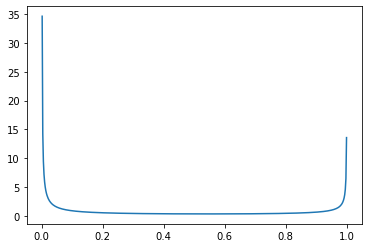

In [3]:
# Lets draw a beta distribution for the given a/b parameters for the small agency fit
# Showing variance in the drop probabilities

a, b, c = sml_bdw.params

x = np.linspace(0.001, 0.999, 500)
pdf = beta.pdf(x, a, b)

fig, ax = plt.subplots()
ax.plot(x, pdf)
plt.show()

# This suggests a large proportion drop right away, and many more stick around fairly permanently

churnmod(proj=array([100.        ,  65.97952723,  56.41317767,  51.98364604,
        49.0854518 ,  46.95459552,  45.28383525,  43.91818041,
        42.76872858,  41.77992777,  40.91484796,  40.14775355,
        39.46003032,  38.83780273,  38.27046614,  37.74974369]), negLL=126.44777960898891, params=array([0.05480971, 0.10629831, 3.62278346]))


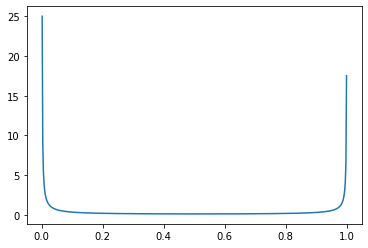

In [4]:
# Now the same exercise for the large agencies

lrg_bdw = retenmod.bdw(large,10)
print(lrg_bdw) #projected 40,37 -- so still too low

pdf = beta.pdf(x, lrg_bdw.params[0], lrg_bdw.params[1])

# Similar to before, large proportions in either tails
fig, ax = plt.subplots()
ax.plot(x, pdf)
plt.show()